In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
countries = pd.read_csv("Proyecto/countries.csv")

In [3]:
paises = pd.DataFrame(countries.loc[:, ["continent",
                       "location",
                       "date",
                       'total_cases_per_million', 
                       "total_deaths_per_million"]])

In [4]:
from datetime import date, datetime, timedelta as td
paises["date"]  = pd.to_datetime(paises["date"], format="%d/%m/%Y")

In [5]:
paises.dtypes

continent                           object
location                            object
date                        datetime64[ns]
total_cases_per_million            float64
total_deaths_per_million           float64
dtype: object

In [6]:
# Función para obtener sólo el año en otra columna 
get_year = lambda x: x.year
# Mapping para obtener sólo el año en otra columna 
paises["year"] = paises["date"].map(get_year)

In [7]:
paises

,continent,location,date,total_cases_per_million,total_deaths_per_million,year
0,Asia,Afghanistan,2020-02-24,0.126,NaN,2020
1,Asia,Afghanistan,2020-02-25,0.126,NaN,2020
2,Asia,Afghanistan,2020-02-26,0.126,NaN,2020
3,Asia,Afghanistan,2020-02-27,0.126,NaN,2020
4,Asia,Afghanistan,2020-02-28,0.126,NaN,2020
...,...,...,...,...,...,...
138936,Africa,Zimbabwe,2021-12-05,9213.121,312.082,2021
138937,Africa,Zimbabwe,2021-12-06,9213.121,312.082,2021
138938,Africa,Zimbabwe,2021-12-07,9382.414,312.281,2021
138939,Africa,Zimbabwe,2021-12-08,9980.539,312.745,2021


In [9]:
pais = paises.dropna(subset=["total_deaths_per_million"])
pais

,continent,location,date,total_cases_per_million,total_deaths_per_million,year
28,Asia,Afghanistan,2020-03-23,1.004,0.025,2020
29,Asia,Afghanistan,2020-03-24,1.054,0.025,2020
30,Asia,Afghanistan,2020-03-25,1.858,0.025,2020
31,Asia,Afghanistan,2020-03-26,2.008,0.050,2020
32,Asia,Afghanistan,2020-03-27,2.284,0.050,2020
...,...,...,...,...,...,...
138936,Africa,Zimbabwe,2021-12-05,9213.121,312.082,2021
138937,Africa,Zimbabwe,2021-12-06,9213.121,312.082,2021
138938,Africa,Zimbabwe,2021-12-07,9382.414,312.281,2021
138939,Africa,Zimbabwe,2021-12-08,9980.539,312.745,2021


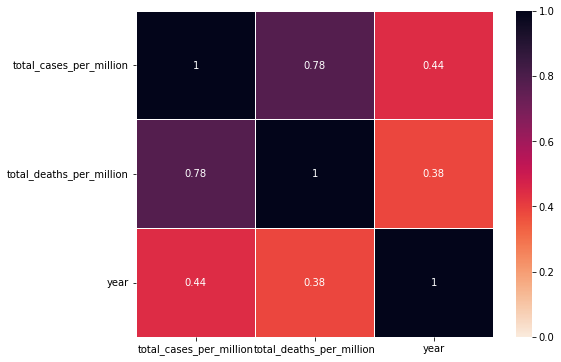

In [13]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(pais.corr(), vmin=0, vmax=1, annot=True, cmap="rocket_r", linewidth=0.5)

In [ ]:
# Vamos a ver si se puede hacer un modelo por probabilidad por año
X = pais[["year"]]
X = pais[["year"]]